In [1]:
# importing models
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

from datetime import timedelta
from pathlib import Path
from warnings import simplefilter
simplefilter('ignore')

In [2]:
#  matplotlib defaults
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout = True, figsize = (15,4), titlesize = 10, titleweight ='bold')
plt.rc('axes', labelweight = 'bold', labelsize = 10, titlesize = 10, titleweight = 'bold', titlepad = 10)

In [3]:
# matplotlib configuration fro higer images
%matplotlib inline
%config InlineBackend.figure_formats = 'retina'

In [4]:
# # Unzipping the datset
# !unzip /kaggle/input/web-traffic-time-series-forecasting/train_1.csv.zip

In [5]:
# !ls

In [6]:
# load the dataset
data_dir = Path("../input/web-traffic-time-series-forecasting/")
df = pd.read_csv(data_dir / "train_1.csv.zip")
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [7]:
# checking for missing values
missing_values = df.isnull().sum()
missing_values

Page              0
2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 551, dtype: int64

In [8]:
missing_values[missing_values > 0]

2015-07-01    20740
2015-07-02    20816
2015-07-03    20544
2015-07-04    20654
2015-07-05    20659
              ...  
2016-12-27     3701
2016-12-28     3822
2016-12-29     3826
2016-12-30     3635
2016-12-31     3465
Length: 550, dtype: int64

In [9]:
total_missing_values = missing_values.sum()
total_missing_values

6192931

In [10]:
# shape of the dataframe
df.shape

(145063, 551)

In [11]:
total_data = np.product(df.shape)
total_data

79929713

In [12]:
# calculating the total percent of missing values
missing_percent = (total_missing_values / total_data) * 100 
missing_percent

7.747971020488964

In [13]:
# method 1 -- fill 0's to NaN columns and Rows
# working with data imputation
df_fill = df.copy()
df_fill = df_fill.fillna(0)
df_fill.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [14]:
# sept
train_data = pd.melt(df_fill,id_vars = ['Page'], value_name = 'Visits', var_name = 'Date')
train_data.head()

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0


In [15]:
train_data.shape

(79784650, 3)

In [16]:
train_data['Date'] = pd.DatetimeIndex(train_data['Date'])
train_data

,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0
...,...,...,...
79784645,Underworld_(serie_de_películas)_es.wikipedia.o...,2016-12-31,10.0
79784646,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,2016-12-31,0.0
79784647,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,2016-12-31,0.0
79784648,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,2016-12-31,0.0


**Data Visualization**

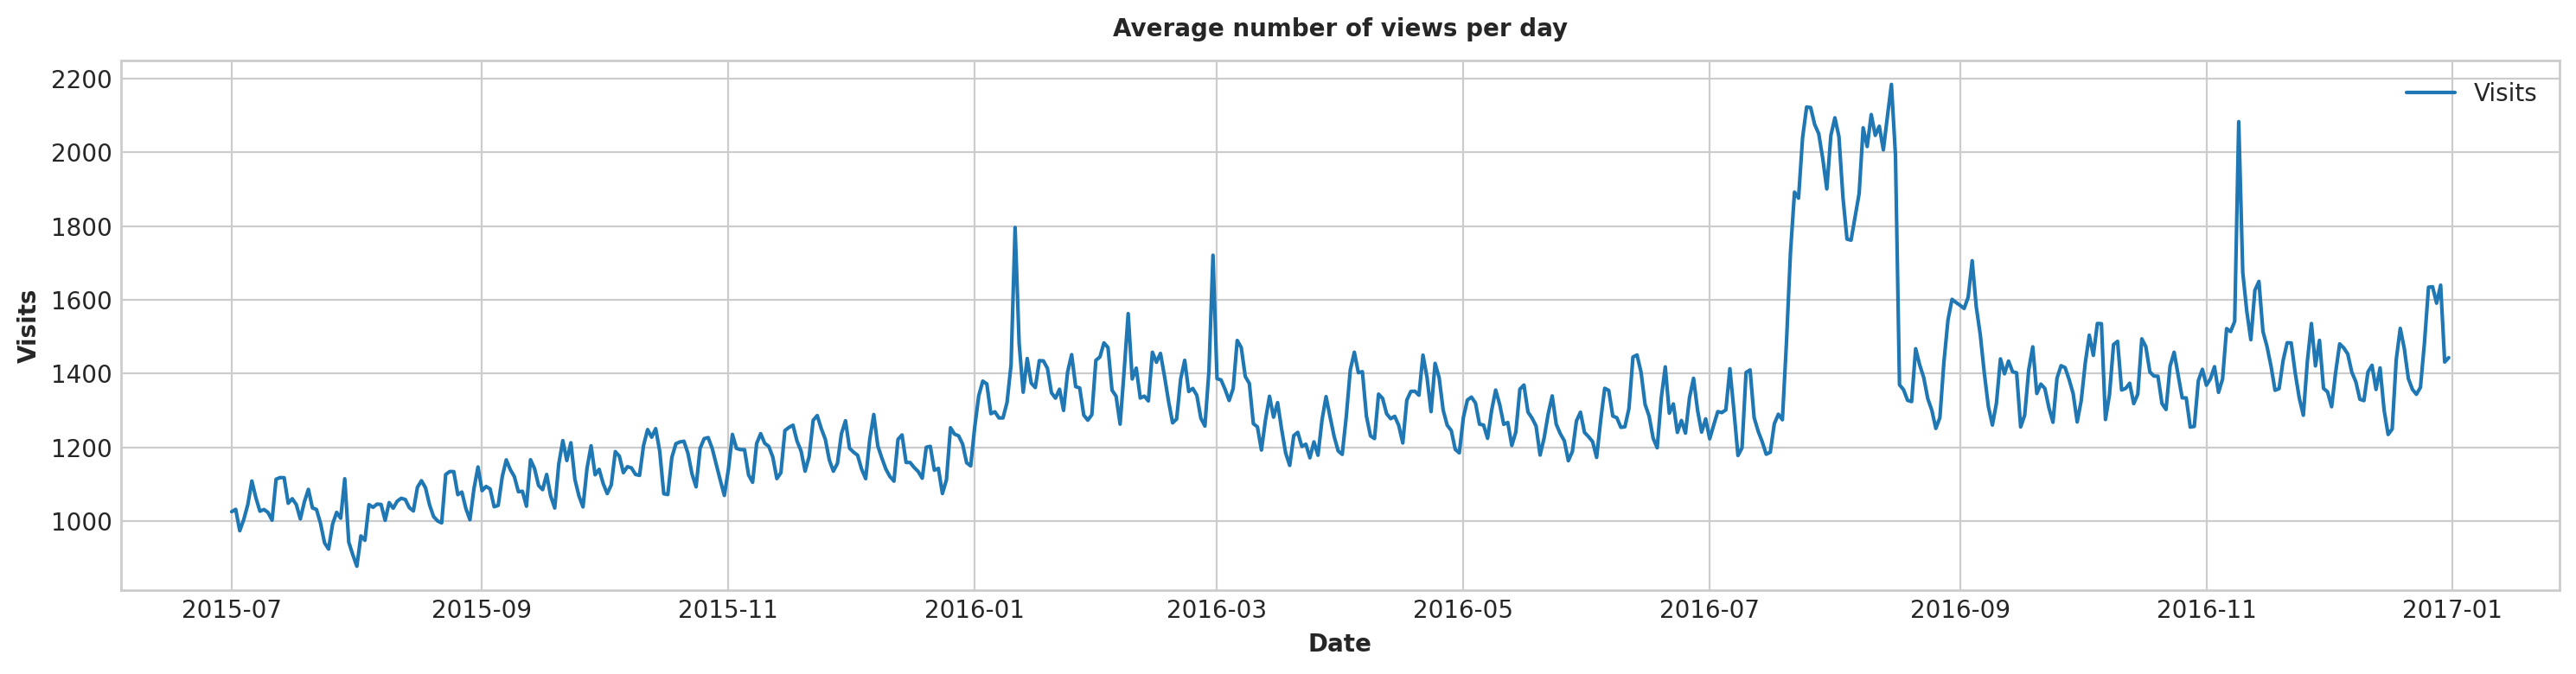

In [17]:
# Visualising for Mean
temp = train_data.groupby('Date')['Visits'].mean()
plt.xlabel('Date')
plt.ylabel('Visits')
plt.title('Average number of views per day')
plt.plot(temp, label='Visits')
plt.legend()
plt.show()

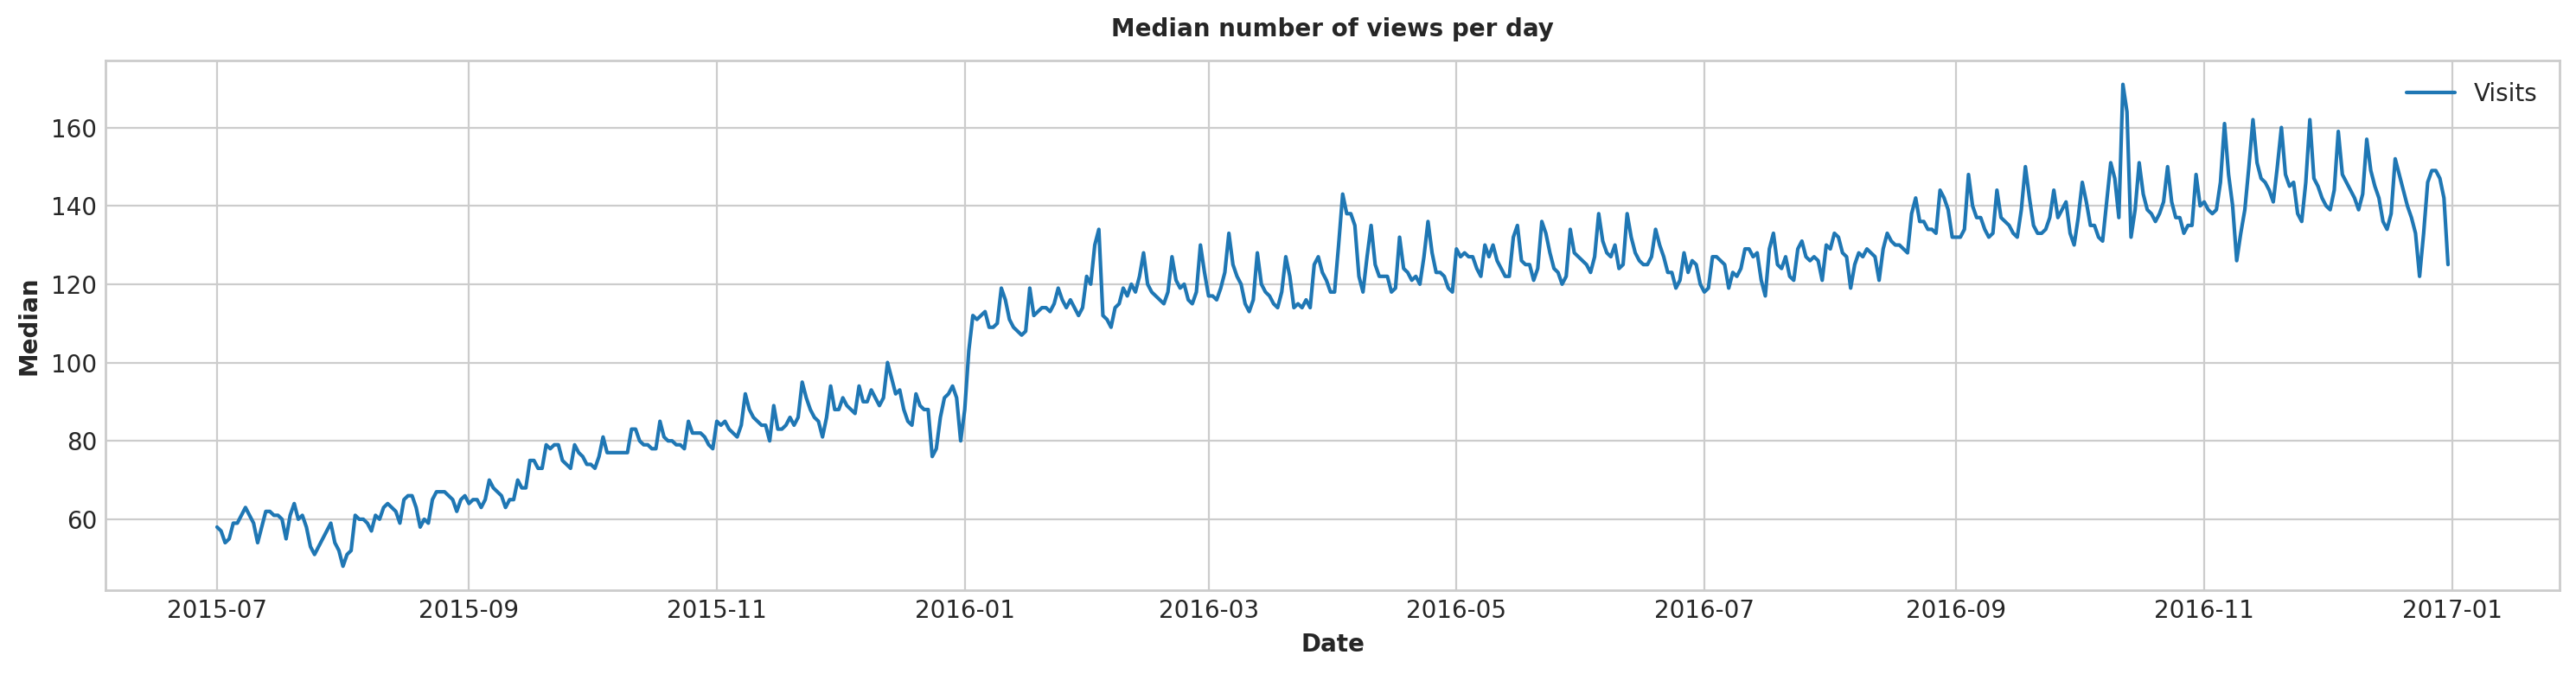

In [18]:
# Visualising for Median Number of Data
temp = train_data.groupby('Date')['Visits'].median()
plt.xlabel('Date')
plt.ylabel('Median')
plt.title('Median number of views per day')
plt.plot(temp, label='Visits')
plt.legend()
plt.show()